# This notebook demonstrates Neural Network using the LSTM (Long Short-Term Memory) model.
The data is obtained from the Yahoo Finance to see if possible future predictions could be made from the previous data.                    



                                                      -Susanta Sigdel

In this notebook we are trying to Pre process data obtained from the YFinance but the hard part is how we will feed the data to the Neural Network

LSTM is a form of recurrence NN  for the purpose of time series forecasting data


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
#Getting the data from the Yahoo Finance API
data = yf.download("BTC-USD", start="2022-06-13", end="2023-01-13")
data_copy = data.copy()
data.index.freq = 'd'

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,214.000000,214.000000,214.000000,214.000000,214.000000,2.140000e+02
mean,19657.108837,20005.383223,19254.847127,19620.197512,19620.197512,3.006371e+10
std,2300.991293,2404.837307,2167.783147,2250.656196,2250.656196,1.428292e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.714767e+09
25%,17142.666016,17381.103516,16928.018555,17142.005859,17142.005859,2.105262e+10
50%,19619.369141,20133.144531,19263.554688,19594.932617,19594.932617,2.781130e+10
75%,21129.786133,21519.286621,20606.770508,21071.231445,21071.231445,3.530740e+10
max,26737.578125,26795.589844,24346.115234,24424.068359,24424.068359,1.189925e+11


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-13 00:00:00+00:00,26737.578125,26795.589844,22141.257812,22487.388672,22487.388672,68204556440
2022-06-14 00:00:00+00:00,22487.986328,23018.951172,20950.818359,22206.792969,22206.792969,50913575242
2022-06-15 00:00:00+00:00,22196.730469,22642.671875,20178.376953,22572.839844,22572.839844,54912007015
2022-06-16 00:00:00+00:00,22576.304688,22868.921875,20265.226562,20381.650391,20381.650391,31183975654
2022-06-17 00:00:00+00:00,20385.718750,21243.312500,20326.519531,20471.482422,20471.482422,27132421514


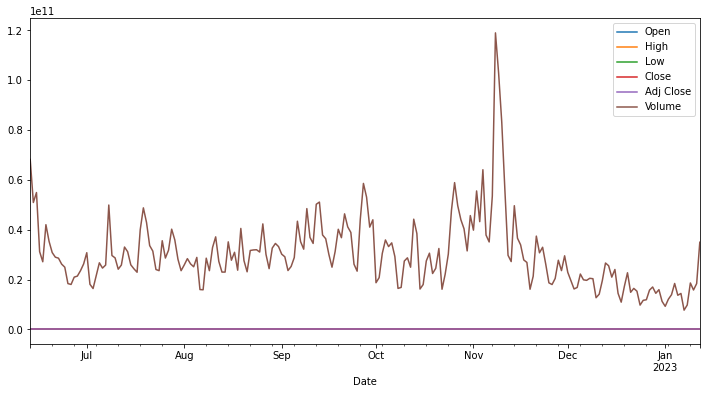

In [ ]:
data.plot(figsize = (12,6))

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-13 00:00:00+00:00,26737.578125,26795.589844,22141.257812,22487.388672,22487.388672,68204556440
2022-06-14 00:00:00+00:00,22487.986328,23018.951172,20950.818359,22206.792969,22206.792969,50913575242
2022-06-15 00:00:00+00:00,22196.730469,22642.671875,20178.376953,22572.839844,22572.839844,54912007015
2022-06-16 00:00:00+00:00,22576.304688,22868.921875,20265.226562,20381.650391,20381.650391,31183975654
2022-06-17 00:00:00+00:00,20385.718750,21243.312500,20326.519531,20471.482422,20471.482422,27132421514
...,...,...,...,...,...,...
2023-01-08 00:00:00+00:00,16954.146484,17091.144531,16924.050781,17091.144531,17091.144531,9768827914
2023-01-09 00:00:00+00:00,17093.992188,17389.957031,17093.992188,17196.554688,17196.554688,18624736866
2023-01-10 00:00:00+00:00,17192.949219,17484.720703,17162.990234,17446.292969,17446.292969,15808338949


In [ ]:
del data['Open']
del data['High']
del data['Low']
del data['Adj Close']
del data['Close']



In [ ]:
data

,Volume
Date,
2022-06-13 00:00:00+00:00,68204556440
2022-06-14 00:00:00+00:00,50913575242
2022-06-15 00:00:00+00:00,54912007015
2022-06-16 00:00:00+00:00,31183975654
2022-06-17 00:00:00+00:00,27132421514
...,...
2023-01-08 00:00:00+00:00,9768827914
2023-01-09 00:00:00+00:00,18624736866
2023-01-10 00:00:00+00:00,15808338949


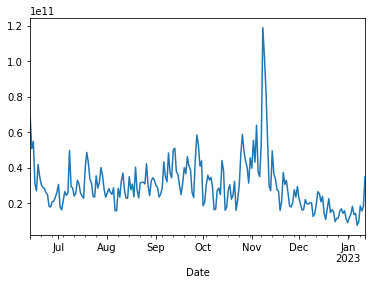

In [ ]:
data['Volume'].plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

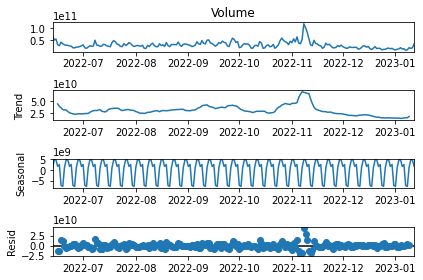

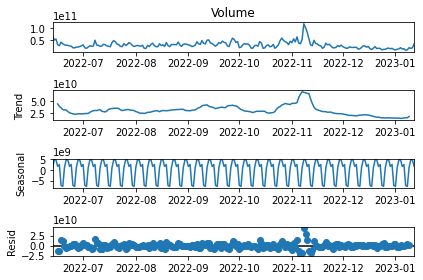

In [ ]:
results = seasonal_decompose(data['Volume'])
results.plot()

In [ ]:
# Currently NN donot need stationaary data. They have grown more advance 

In [ ]:
len(data)

214

In [ ]:
# Training the Model
# Keeping the data observed 30 days before the current into the Training set and
# Leaving the rest of the 30 days data as a testing set.

In [ ]:
training_set = data.iloc[:184]
testing_set = data.iloc[184:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler
# Minmaxscaler to Process the data into a scale of  0 to 1

In [ ]:
data.head(),data.tail()

(                                Volume
 Date                                  
 2022-06-13 00:00:00+00:00  68204556440
 2022-06-14 00:00:00+00:00  50913575242
 2022-06-15 00:00:00+00:00  54912007015
 2022-06-16 00:00:00+00:00  31183975654
 2022-06-17 00:00:00+00:00  27132421514,                                 Volume
 Date                                  
 2023-01-08 00:00:00+00:00   9768827914
 2023-01-09 00:00:00+00:00  18624736866
 2023-01-10 00:00:00+00:00  15808338949
 2023-01-11 00:00:00+00:00  18372283782
 2023-01-12 00:00:00+00:00  34971338710)

In [ ]:
# It prints the first five values and last two values. 
# we dont want the model to get confused because of different magnitude


In [ ]:
scaler = MinMaxScaler()
scaler.fit(training_set)
scaled_train = scaler.transform(training_set)
scaled_test = scaler.transform(testing_set)

In [ ]:
scaled_train[:10]

array([[0.52215663],
       [0.35947262],
       [0.39709229],
       [0.17384461],
       [0.13572514],
       [0.2756971 ],
       [0.21285238],
       [0.17040561],
       [0.15301619],
       [0.14929585]])

In [ ]:
# to feed the network a sequence of data. Using that it will give me the value for the next month
# we need to create batches like this one to train NN


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
# define Generator
number_input = 3 #no of months
number_features = 1 # no of time series data
generator = TimeseriesGenerator(scaled_train, scaled_train, length = number_input,batch_size = 1)

In [ ]:
x,y = generator[0]
print(f'The given Array: \n{x.flatten()}')
print(f'Predict this y: \n{y}')

The given Array: 
[0.52215663 0.35947262 0.39709229]
Predict this y: 
[[0.17384461]]


In [ ]:
x.shape

(1, 3, 1)

Importing a library thas not in Colab
!pip install matplot

In [ ]:
number_input = 30
generator = TimeseriesGenerator(scaled_train, scaled_train, length = number_input,batch_size = 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# The part where we are actually creating a model
# LSTM with 100 neurons and relu as the activation function, specified the input shape of the data
# Final output layer, which will make the final prediction
# we will compile the model using the adam function and mse as the loss function


In [ ]:
model = Sequential() # The reason using sequential is to keep adding the layers to the sequence
model.add(LSTM(100, activation = 'relu', input_shape= (number_input,number_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training the  model
model.fit(generator, epochs = 50)# Fit the model by calling the generator which has the input and output to train the model

Epoch 1/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0082
Epoch 2/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0077
Epoch 3/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0076
Epoch 4/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0078
Epoch 5/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0080
Epoch 6/50
154/154 [==============================] - 2s 14ms/step - loss: 0.0082
Epoch 7/50
154/154 [==============================] - 2s 14ms/step - loss: 0.0075
Epoch 8/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0077
Epoch 9/50
154/154 [==============================] - 3s 16ms/step - loss: 0.0072
Epoch 10/50
154/154 [==============================] - 4s 26ms/step - loss: 0.0078
Epoch 11/50
154/154 [==============================] - 4s 26ms/step - loss: 0.0076
Epoch 12/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0076
Epoch 13/50
1

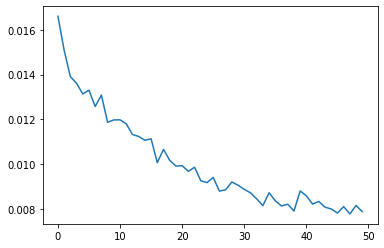

In [ ]:
loss_per_epoch = model.history.history['loss']# plotting los per epoch which the model has been storing in each epoch
plt.plot(range(len(loss_per_epoch)),loss_per_epoch) # Plotting the loss epoch and the loss seems to be decreasing

In [ ]:
last_train_batch = scaled_train[-30:]# taking the last 30 days value in my training set to make the prediction for the first  value in the test set

In [ ]:
last_train_batch = last_train_batch.reshape(1,number_input, number_features)#  reshaping as earlier shape

In [ ]:
model.predict(last_train_batch)# it will make the prediction for the first value of the testing set

1/1 [==============================] - 0s 243ms/step


array([[0.13359667]], dtype=float32)

In [ ]:
scaled_test[0] # Checking what was the original value and  comparing the difference on how close the  predicted value is from the org data

array([0.12069076])

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-number_input:]
current_batch = first_eval_batch.reshape((1,number_input, number_features))
for i in range(len(testing_set)):
  current_pred = model.predict(current_batch)[0] #Get the prediction value for the first batch
  test_predictions.append(current_pred)# Append the prediction into the array
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)# use the prediction to update the batch and dropping the first value


1/1 [==============================] - 0s 21ms/step


In [ ]:
test_predictions

[array([0.12776527], dtype=float32),
 array([0.11292642], dtype=float32),
 array([0.09572081], dtype=float32),
 array([0.08780727], dtype=float32),
 array([0.09068292], dtype=float32),
 array([0.09880655], dtype=float32),
 array([0.1054147], dtype=float32),
 array([0.10760756], dtype=float32),
 array([0.1067221], dtype=float32),
 array([0.10528798], dtype=float32),
 array([0.10537571], dtype=float32),
 array([0.10713807], dtype=float32),
 array([0.10964407], dtype=float32),
 array([0.11193223], dtype=float32),
 array([0.11363067], dtype=float32),
 array([0.11488353], dtype=float32),
 array([0.11597829], dtype=float32),
 array([0.11707585], dtype=float32),
 array([0.11829085], dtype=float32),
 array([0.11960588], dtype=float32),
 array([0.12095203], dtype=float32),
 array([0.12217416], dtype=float32),
 array([0.12310698], dtype=float32),
 array([0.12390432], dtype=float32),
 array([0.12465732], dtype=float32),
 array([0.1254352], dtype=float32),
 array([0.12633978], dtype=float32),
 arr

In [ ]:
data.head()

,Volume
Date,
2022-06-13 00:00:00+00:00,68204556440
2022-06-14 00:00:00+00:00,50913575242
2022-06-15 00:00:00+00:00,54912007015
2022-06-16 00:00:00+00:00,31183975654
2022-06-17 00:00:00+00:00,27132421514


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)  # Perfroming the inverse scale to the range of Original data Set values.

In [ ]:

testing_set['Predictions'] = true_predictions

<ipython-input-148-9a2299ee2531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_set['Predictions'] = true_predictions


In [ ]:
testing_set

,Volume,Predictions
Date,,
2022-12-14 00:00:00+00:00,25534481470,2.628640e+10
2022-12-15 00:00:00+00:00,20964448341,2.470924e+10
2022-12-16 00:00:00+00:00,24031608960,2.288053e+10
2022-12-17 00:00:00+00:00,14463581825,2.203944e+10
2022-12-18 00:00:00+00:00,10924354698,2.234508e+10
2022-12-19 00:00:00+00:00,17221074814,2.320850e+10
2022-12-20 00:00:00+00:00,22722096615,2.391086e+10
2022-12-21 00:00:00+00:00,14882945045,2.414392e+10
2022-12-22 00:00:00+00:00,16441573050,2.404981e+10


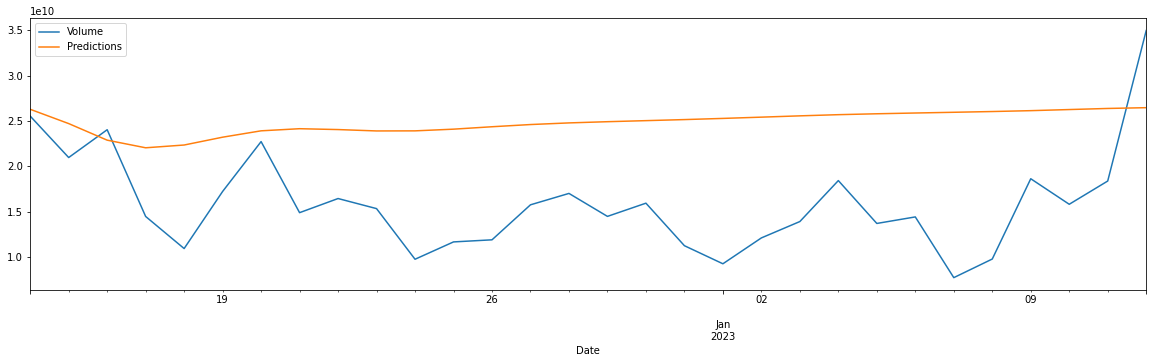

In [ ]:
testing_set.plot(figsize = (20,5))

Using the Root Mean Square Error Method to see how much differnce will it make compared to the original data.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(testing_set['Volume'],testing_set['Predictions']))
print(rmse)

10478503028.530937


The result form the RMSE is showing us that the difference is highe so the data is biased. SO we need to collect more data. 

*** End****

LSTM: It is a complex structure located in the hidden layer known as the memory block. It might contain more than 1 memory call and each cell has a recurrent self connected linear init called the Constant Error Carousel(CEC). It is responsible to solve the vanishing gradient problem. A memory cell is located beside the RNN cell, epoch allows memories from previous time frames to b collected and transferred into the  next one. That is why LSTM is a well-known  neural network due tot its ability to cope with long term dependency. It is the optimal model for time series data. LSTM model can be applied to the non-linear component of the data whereas. When experimenting with LSTM it is found that improving from 2 layers to 3 layers of didn’t show a significant improvement. The other option as compared to LSTM is Deep-Bidirectional LSTM(BiLSTM) since it has better prediction accuracy compared to LSTM. The LSTM is able to predict long-term predictions since their dependency is on the past data. 
Also, NN can work with linear and non-linear time series data. 
Also it gives a better performance when its is trained using a lot of data. The neural network model took advantage of the large training se which produces better results compared to the ARIMA model. 




ARIMA-ARIMA model can be applied to the linear component of the data.  
 It requires large  number of observations and estimations. It is widely used to deal with the trend and seasonality. 